# Problem 1: Other activation functions (20%)
### The leaky Relu is defined as $max(0.1x, x)$. 
 - What is its derivative? (Please express in "easy" format")
 - Is it suitable for back propagation?
 
### $tanh$ is defined as  $\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$. 
 - What is its derivative? (Please express in "easy" format")
 - Is it suitable for back propagation?
 - How is it different from the sigmoid activation

Relu' = +1   for x>=0
        -0.1 for x<0
        
Leaky ReLU are one attempt to fix the “dying ReLU” problem. When x<0, a leaky ReLU will instead have a small negative slope. Some people have reported success with this form of activation function, but the results are not always consistent. 
(Source: “CS231n Convolutional Neural Networks for Visual Recognition”)


tanh' = 1- tanh^2

It makes the training less difficult as it less prone to saturation in the hidden layers of the network. The derivative is helpful, since for training purposes, the value of the derivative is just its output. On average, it is more likely to create output values that are close to 0, which is beneficial when forward propagating to subsequent layers. 

It is centered around zero, which means it has larger range compared to sigmoid function and this leads to larger derivatives. Having large derivatives leads to greater updates to weights and finally faster convergence to the minimum value of the cost function.

# Problem 2: Linear regression in Keras (40%)

#### We'd like to use keras to perform linear regression and compare it to another tool (scikit-learn)
#### We'll compare OLS, ridge ($L2$ regularization) and LASSO ($L1$ regularization) using both keras and scikit-learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# many of these imports to be removed
from keras.models import Model, Input
from keras.layers import Dense, Softmax, Dropout
from keras.regularizers import l1_l2
from keras.optimizers import RMSprop
import keras.backend as K

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# Generate some data
np.random.seed(1024)
num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 2, 0, 4])  # notice, there are zeros!
noise_amplitude = .05

num_variables = coefs.shape[0]

x = np.random.rand(num_observations, num_variables)
y = np.dot(x, coefs) + noise_amplitude * np.random.rand(num_observations)

cutoff = int(.8 * num_observations)
x_train, x_test = x[:cutoff], x[cutoff:]
y_train, y_test = y[:cutoff], y[cutoff:]

In [3]:
x_train.shape, y_train.shape

((819, 7), (819,))

In [ ]:

# insert code to make predictions here
# ...
# lin_reg_predictions = ...
mean_squared_error(y_test, lin_reg_predictions)

In [ ]:
# Show that the coefficients are all close the the "real" ones used to generate the data
# lin_reg_coefs = ...
pd.Series(lin_reg_coefs, name='fit coefficients').to_frame().join(pd.Series(coefs, name='real coefficients')) 

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [7]:
# Now we will use keras to solve the same problem 
K.clear_session()
#input_data = Input(shape=FIXME)
# add model definition here
# keras_lin_reg = ...
# don't forget to compile your model

In [ ]:

plot_model_in_notebook(keras_lin_reg)  # to be removed 

## How many parameters does the model have? 
### Explicitly show the calculation, explain it, and verify that it agrees with `model.count_params()`

In [9]:
# ADD CODE HERE

In [ ]:
#keras_lin_reg.fit( ... ) 
# mean_squared_error(... 

In [11]:
# find the coefficients
# keras_ols_coefs = ...

pd.Series(keras_ols_coefs, name='keras ols coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,keras ols coefficients,real coefficients
0,-1.202948,-1.20
1,5.004425,5.00
2,-0.004936,0.00
3,0.219746,0.22
4,2.001384,2.00
5,-0.000178,0.00
6,3.998092,4.00


## Now we will add some regularization

In [ ]:
from keras.regularizers import l1_l2
regularizer = l1_l2(l1=0, l2=.1)
 # Dense(...) -> Dense(..., kernel_regularizer=regularizer)
    
# input_data = ...
# keras_ridge_model = ...
# don't forget to compile the model
plot_model_in_notebook(keras_ridge_model)  # to be removed

In [ ]:
# keras_ridge_model.fit(...
# mean_squared_error(y_test, keras_ridge_model.predict(x_test))

In [1]:
#keras_ridge_coefs = ...
#pd.Series(keras_ridge_coefs, name='keras ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

In [ ]:
# ridge regression in sklaern
from sklearn.linear_model import Ridge

# Add code here
# sklearn_ridge_coef = ...
#pd.Series(sklearn_ridge_coef, name='ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

In [ ]:
# compare coefficients from various methods
pd.concat([
    pd.Series(sklearn_ridge_coef, name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(coefs, name='real coefs')
], axis=1)

## In fact, given the zero coefficients, LASSO might have been a better model. 
## LASSO uses $L_{1}$ regularization which will make sparse coefficients (some are zero).

In [17]:
from sklearn.linear_model import Lasso
# Add code here
# sklearn_lasso_coefs = 
pd.Series(sklearn_lasso_coefs, name='lasso coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,lasso coefficients,real coefficients
0,-0.048288,-1.20
1,3.815515,5.00
2,0.000000,0.00
3,0.000000,0.22
4,0.746026,2.00
5,-0.000000,0.00
6,2.731789,4.00


In [ ]:
# now do lasso with keras

#keras_lasso_model = ...
# don't forget to compile the model
plot_model_in_notebook(keras_lasso_model)

In [19]:
# keras_lasso_model.fit(...
# keras_lasso_coefs = ...

In [ ]:
# compare all the coefficients
pd.concat([
    pd.Series(sklearn_ridge_coefs, name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(sklearn_lasso_coefs, name='lasso coefs'),
    pd.Series(keras_lasso_coefs, name='keras L1 coefs'),
    pd.Series(lin_reg.coef_, name='ols coefs'),
    pd.Series(coefs, name='real coefs'),
], axis=1)

In [21]:
# TODO(find optimal regularization paramter) ?

# Problem 3: Keras for harder mnist problems (40%)
#### The deep net during lecture has a hard time distiguishing between 9 and 4.
#### We will build an algorithm to do this binary classification task 

In [1]:
# safe to restart here

In [18]:
import numpy as np
import pandas as pd
%pylab inline

# many of these to be removed
from keras.datasets import mnist
from keras.models import Model, Input
from keras.layers import Dense, Softmax, Dropout
from keras.regularizers import l1_l2
from keras.optimizers import RMSprop
import keras.backend as K

Populating the interactive namespace from numpy and matplotlib


In [19]:
from keras.utils import to_categorical

def preprocess_training_data(data):
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    data = data.astype('float32') / 255
    return data

def preprocess_targets(target, num_classes):
    return to_categorical(target, num_classes)


def subset_to_9_and_4(x, y):  # this is a new function
    mask = (y == 9) | (y == 4)
    new_x = x[mask]
    new_y = (y[mask] == 4).astype('int64')
    return new_x, new_y

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = preprocess_training_data(x_train)
x_test = preprocess_training_data(x_test)

num_classes = np.unique(y_train).shape[0]

y_train_ohe = preprocess_targets(y_train, num_classes)
y_test_ohe = preprocess_targets(y_test, num_classes)

train_frac = 0.8
cutoff = int(x_train.shape[0] * train_frac)
x_train, x_val = x_train[:cutoff], x_train[cutoff:]
y_train, y_val = y_train[:cutoff], y_train[cutoff:]
y_train_ohe, y_val_ohe = y_train_ohe[:cutoff], y_train_ohe[cutoff:]

x_train, y_train = subset_to_9_and_4(x_train, y_train)
x_val, y_val = subset_to_9_and_4(x_val, y_val)
x_test, y_test = subset_to_9_and_4(x_test, y_test)

print(x_train.shape)

(9457, 784)


In [20]:
# first try logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Add code here
lr =LogisticRegression()
lr.fit(x_train, y_train)

sklearn_lr_predictions = lr.predict(x_test)
accuracy_score(y_test, sklearn_lr_predictions)

0.9728779507785033

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [46]:
K.clear_session()
num_hidden_units = 256
num_classes =1
# define model
digit_input = Input(shape=(x_train.shape[1],), name='digit_input')
x = Dense(num_hidden_units, activation='relu', name='dense_0')(digit_input)
x = Dropout(.1, name='dropout_0')(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(digit_input, output)
model.compile(optimizer=RMSprop(lr=2e-3, decay=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#NB: you probably want BINARY cross entropy i.e. 'binary_crossentropy' for the loss function
# model.compile(...

In [47]:
plot_model_in_notebook(model)

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [48]:
# how many params does the model have? 
model.count_params()

201217

In [49]:
# Add code here
# model.fit(...
model.fit(x_train, y_train, batch_size=128, validation_data=(x_val, y_val), epochs=64, shuffle=True, verbose=0)
keras_predictions = np.argmax(model.predict(x_test), axis=1)

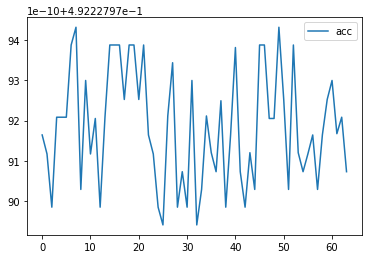

In [58]:
pd.DataFrame(model.history.history)[['acc']].plot()

In [50]:
from sklearn.metrics import f1_score, accuracy_score
accuracy_score(y_test, keras_predictions)

0.5067805123053741

In [ ]:
# DONE! Congrats!